### 서울시 자치구

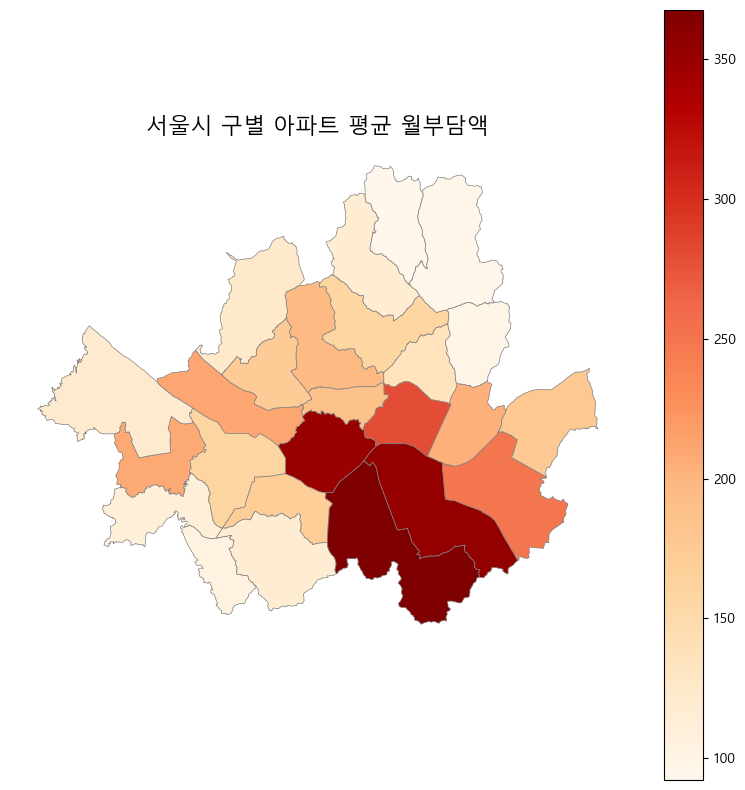

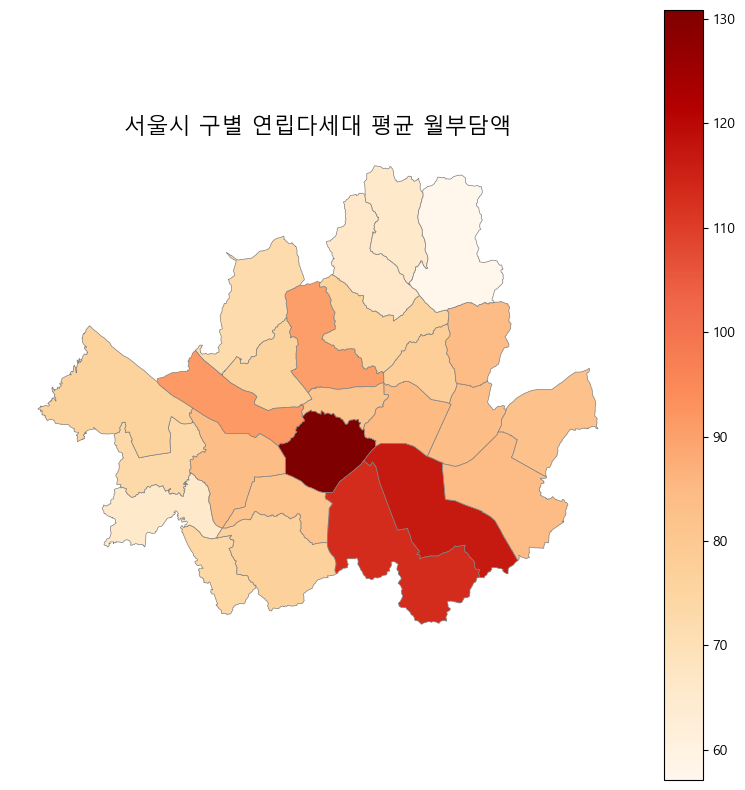

In [141]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1) Shapefile 불러오기 및 서울시 구 필터
gdf = gpd.read_file('sig.shp', encoding='cp949')
gdf['SIG_CD'] = gdf['SIG_CD'].astype(str)
seoul_gdf = gdf[gdf['SIG_CD'].str.startswith('11')].copy()

# 2) 두 데이터프레임(apt_result, yld_result)을 리스트로 묶어서 반복 처리
#    → 각 원소는 (표시명, DataFrame, 컬럼명)
layers = [
    ('아파트', apt_result, '평균_월부담액'),
    ('연립다세대', yld_result, '평균_월부담액')
]

for label, df_result, value_col in layers:
    # 3) SIG_CD 타입 맞추기 (apt_result, yld_result에서 SIG_CD가 int이면 str으로)
    df_result = df_result.copy()
    df_result['SIG_CD'] = df_result['SIG_CD'].astype(str)

    # 4) 도시 경계 + 결과 병합
    merged = seoul_gdf.merge(
        df_result[['SIG_CD', value_col]],
        on='SIG_CD',
        how='left'
    )

    # 5) 히트맵 그리기
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    merged.plot(
        column=value_col,
        cmap='OrRd',
        linewidth=0.5,
        edgecolor='gray',
        legend=True,
        ax=ax
    )
    ax.set_title(f'서울시 구별 {label} 평균 월부담액', fontsize=16)
    ax.axis('off')
    plt.tight_layout()
    plt.show()


### 노원구 법정동

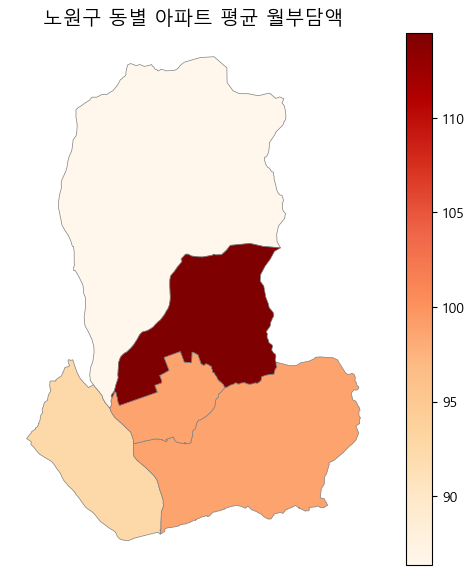

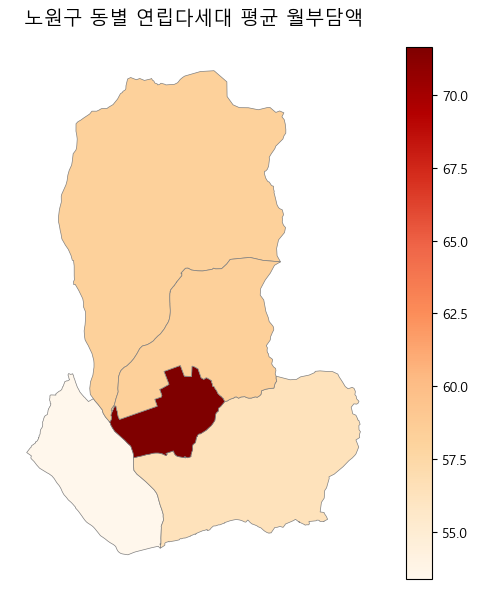

In [148]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1) 노원구 동 경계 Shapefile 불러오기
emd_gdf = gpd.read_file('emd.shp', encoding='cp949')

# 2) 'EMD_CD'를 문자열로 변환 후, 서울시(11로 시작) 동만 남기기
emd_gdf['EMD_CD'] = emd_gdf['EMD_CD'].astype(str)
emd_seoul = emd_gdf[emd_gdf['EMD_CD'].str.startswith('11')].copy()

# 3) “아파트”·“연립다세대” 동별 평균월부담액 데이터
#    (이 코드 이전에 apt_nw_grouped, yld_nw_grouped가 이미 생성되어 있다고 가정)
#    apt_nw_grouped.columns == ['동', '평균_월부담액']
#    yld_nw_grouped.columns == ['동', '평균_월부담액']

layers = [
    ('아파트', apt_nw_grouped),
    ('연립다세대', yld_nw_grouped)
]

for label, df_avg in layers:
    # 4) 동 이름(EMD_KOR_NM) 기준으로 inner 병합 → 노원구 동만 선택됨
    merged = emd_seoul.merge(
        df_avg[['동', '평균_월부담액']],
        left_on='EMD_KOR_NM',
        right_on='동',
        how='inner'
    )

    # 5) 동별 히트맵 그리기
    fig, ax = plt.subplots(figsize=(6, 6))
    merged.plot(
        column='평균_월부담액',
        cmap='OrRd',
        linewidth=0.5,
        edgecolor='gray',
        legend=True,
        ax=ax
    )
    ax.set_title(f'노원구 동별 {label} 평균 월부담액', fontsize=14)
    ax.axis('off')
    plt.tight_layout()
    plt.show()
